This is a simple project where we will predict the classification of the `Lending Club` dataset. The dataset is available on Kaggle and can be found [here](https://www.kaggle.com/wordsforthewise/lending-club). The dataset contains information about the loans given by the Lending Club. The dataset contains 2 files, one for the accepted loans and the other for the rejected loans. We will be using the accepted loans dataset for our analysis.

Let's see what we are working with 

> The dataset is given in the datasets folder.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("datasets/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Well this is what we are working with. I think data is going to be huge and we will have to do a lot of data cleaning and preprocessing. Let's get started.

Let's get some more info.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The dataset has `14` columns and `9577` rows and there are no data missing(that's a good thing).

Let's do some exploratory data analysis.

> For your information the dataset we are using contains real data.

So, let's see what we are working with. 

In [34]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


SO, we have 14 colums and 9577 rows. Now i'm going to make a `histogram` of the `fico` score according to the `creadit.policy` column.

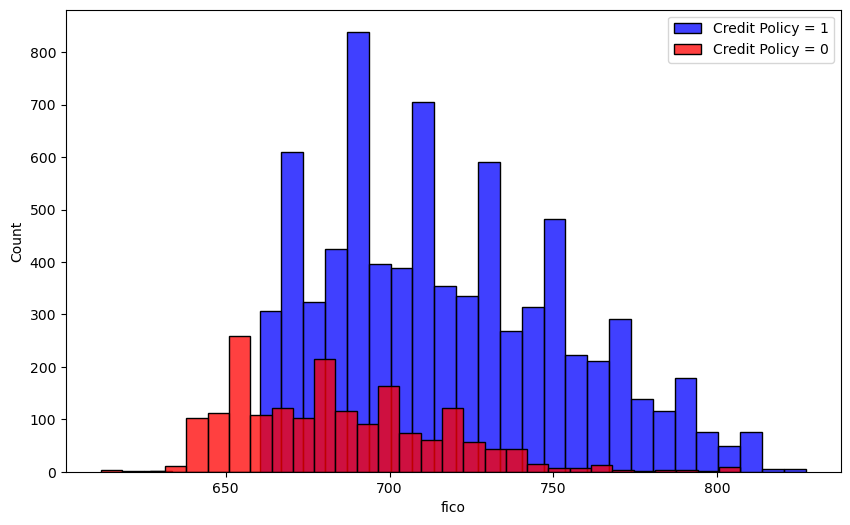

In [35]:
#make a `histogram` of the `fico` score according to the `creadit.policy` column.

plt.figure(figsize=(10,6))

sns.histplot(df[df['credit.policy']==1]['fico'], bins=30, color='blue', label='Credit Policy = 1', kde=False)

sns.histplot(df[df['credit.policy']==0]['fico'], bins=30, color='red', label='Credit Policy = 0', kde=False,)

plt.legend()

We can also have the same results using the pandas `built-in` function `hist()`.

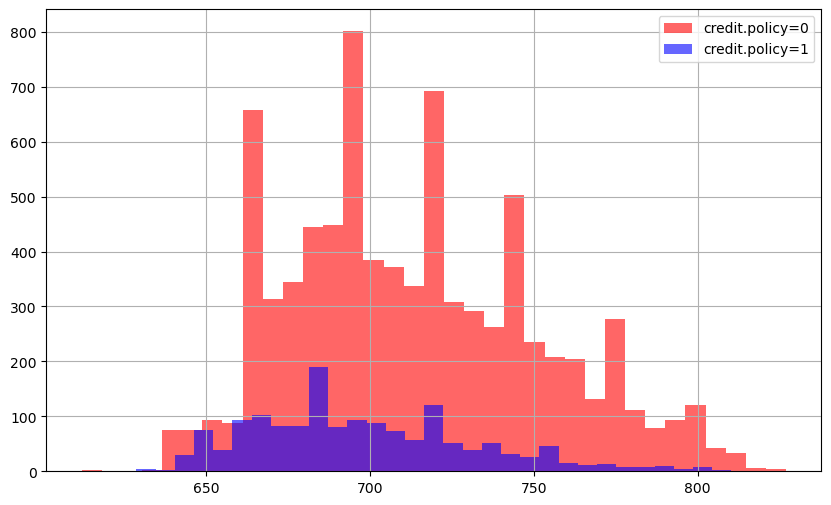

In [36]:
#make a `histogram` of the `fico` score according to the `creadit.policy` column.

plt.figure(figsize=(10,6))


df[df['not.fully.paid']==0]['fico'].hist(bins=35, color='red', label='credit.policy=0', alpha=0.6)

df[df['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', label='credit.policy=1', alpha=0.6)


plt.legend()

Now, we can see an interesting pattern here. The `fico` score is higher for the people who doesn't meet the `credit policy` and the `fico` score is lower for the people who meet the `credit policy`. This is interesting.

Now let's do the same for the `not.fully.paid` column.

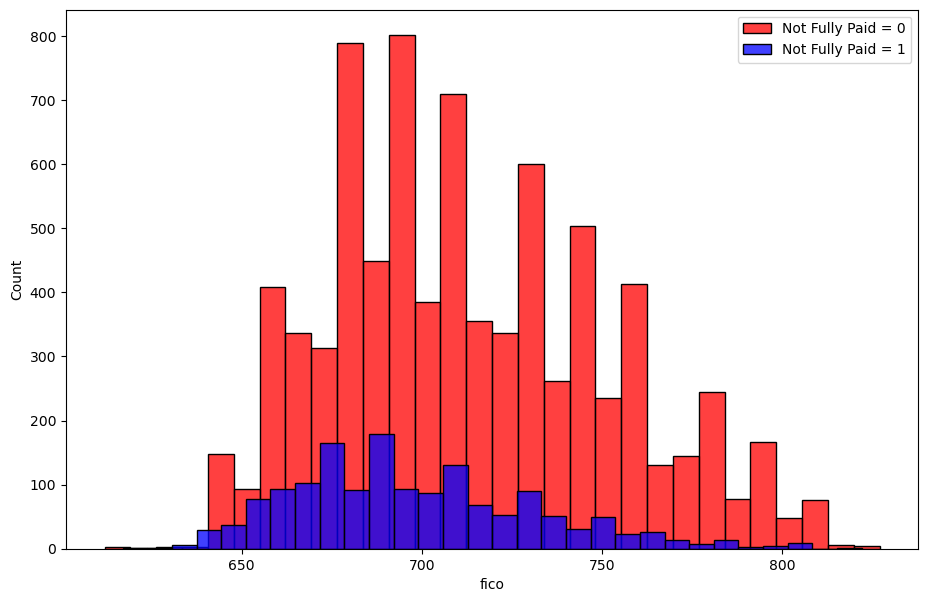

In [37]:
plt.figure(figsize=(11,7))

sns.histplot(df[df['not.fully.paid']==0]['fico'], bins=30, color='red', label='Not Fully Paid = 0', kde=False,)

sns.histplot(df[df['not.fully.paid']==1]['fico'], bins=30, color='blue', label='Not Fully Paid = 1', kde=False,)



plt.legend()

Here, we can see that majority of the people have fully paid their loans and only a few people have not fully paid their loans. That's a good thing.

Now let's recap and make a `countplot` of the `purpose` column and give the `not.fully.paid` column as the hue.

<Axes: xlabel='purpose', ylabel='count'>

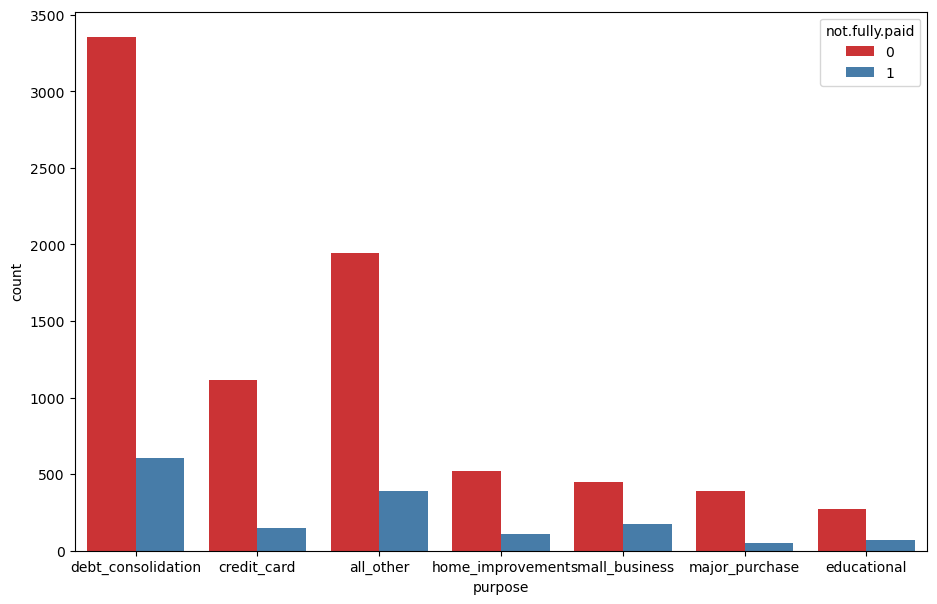

In [38]:
plt.figure(figsize=(11,7))

sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')


With this plot we can see that the `debt_consolidation` is the most common reason for the loan , and the `credit.policy` and `other reasons` come next.

Here's some more plots to practice.

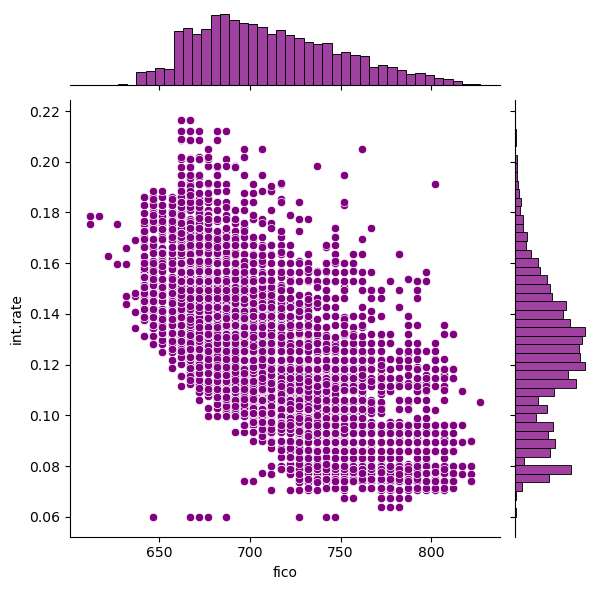

In [39]:
sns.jointplot(x='fico', y='int.rate', data=df, color='purple')

The interest rate is higher for the people with a lower `fico` score and the interest rate is lower for the people with a higher `fico` score.

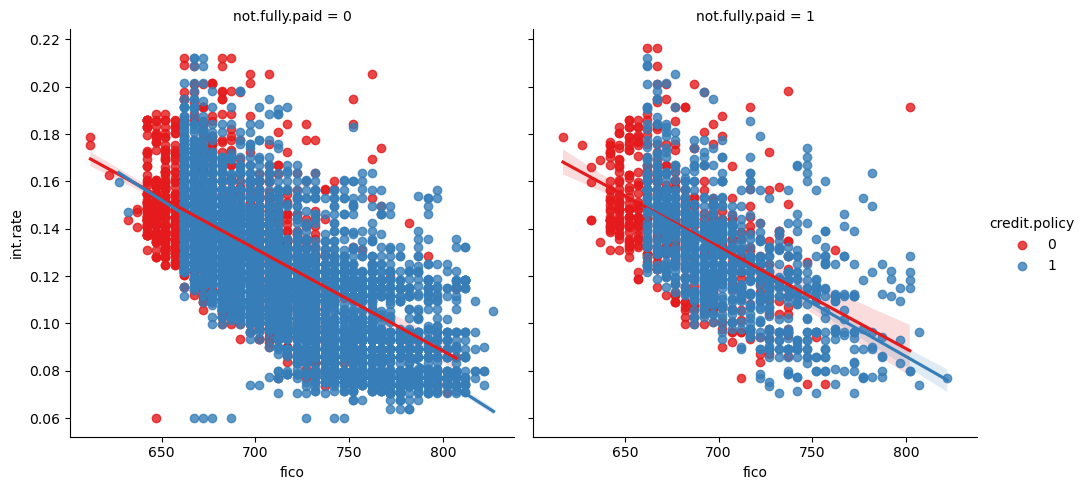

In [40]:
sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy', col='not.fully.paid', palette='Set1')

I think that's enough for the exploratory data analysis. Now let's move on to the machine learning part.

Now, if you know about machine learning, you know that we have to convert the categorical columns to numerical columns so that the machine learning model can understand it. 

> This is called `one hot encoding`. where we convert the categorical columns to numerical columns with the help of `pd.get_dummies()` function and then we drop the original columns.

SO, let's do this.


In [41]:
final_data = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [42]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


Now we have some extra columns and we have to drop the original columns. Now we can train our model.

In [43]:
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis=1)

y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
predictions[1:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0])

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874

[[1986  445]
 [ 343  100]]


Not great and not terrible. We have an accuracy of `0.74` which is not bad but not great either. Now let's see what happens if we use a `random forest` model.

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

rfc_pred[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

> this might take some time because. Random forest is a complex model and it takes time to train and if we have a large dataset and the n_estimators is high, it will take a lot of time.

In [47]:
print(classification_report(y_test, rfc_pred))

print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.43      0.02      0.04       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874

[[2418   13]
 [ 433   10]]


Well that's a great improvement. We have an accuracy of `0.85` which is great. It's almost `10%` better then the `decision tree` model.

Well that's it for this project. And the ranodm forrest is the best model for this dataset And the statement `random forest is will outperform the decision tree almost every time` is true.